In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "exams.csv"

# LOADING A CSV FILE

In [3]:
data = pd.read_csv(url)
df = data.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


# DATA WRANGLING
Data wrangling is a broad term used, often informally, to describe the process of
transforming raw data to a clean and organized format ready for use. For us, data
wrangling is only one step in preprocessing our data, but it is an important step.



## Describing the data


In [4]:
df.shape #Seeing the number of rows and columns in the given dataset

(100, 8)

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df['math score'] = df['math score'].astype('float64')
df['reading score'] = df['reading score'].astype('float64')
df['writing score'] = df['writing score'].astype('float64')

In [7]:
df.describe()
#Getting the descriptive statistics for the numerical values

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


#### Note: Sometimes the categorical variables are encoded with numeric values as 0 and 1. At that time the summary statistics doen't make any sense for categorical variables.

## Navigating DataFrames
Use loc or iloc to select one or more rows or values:

In [8]:
df.head()
df.iloc[1:4]
df.iloc[0]
df.iloc[:4]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70.0,76.0,69.0
1,female,group C,some college,standard,none,47.0,52.0,50.0
2,male,group E,high school,standard,none,75.0,72.0,68.0
3,female,group B,some college,free/reduced,completed,44.0,52.0,54.0


DataFrames do not need to be numerically indexed. We can set the index of a Data‐
Frame to any value where the value is unique to each row.

In [9]:
df1 = df.set_index('race/ethnicity')
df1.head()
df1.loc['group E'] # Use of label in order to search the rows that we want

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group E,female,associate's degree,standard,none,70.0,76.0,69.0
group E,male,high school,standard,none,75.0,72.0,68.0
group E,male,some college,standard,none,75.0,66.0,64.0
group E,male,some college,standard,none,81.0,67.0,67.0
group E,female,bachelor's degree,free/reduced,completed,79.0,81.0,87.0
group E,male,high school,standard,none,84.0,64.0,63.0
group E,male,some college,free/reduced,completed,96.0,94.0,90.0
group E,male,some high school,standard,completed,96.0,86.0,86.0
group E,male,associate's degree,free/reduced,completed,69.0,57.0,64.0


In [10]:
## Selecting rows based on the conditional

In [11]:
df[df["gender"]=='female'].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70.0,76.0,69.0
1,female,group C,some college,standard,none,47.0,52.0,50.0
3,female,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,female,group B,bachelor's degree,standard,completed,67.0,76.0,80.0
5,female,group B,some college,free/reduced,none,50.0,52.0,54.0


In [12]:
# We can use the multiple conditions too
df[(df['gender']=='female') & (df['parental level of education'] == "master's degree")]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
57,female,group D,master's degree,standard,none,48.0,67.0,64.0
79,female,group A,master's degree,standard,completed,60.0,73.0,83.0
90,female,group E,master's degree,standard,none,68.0,69.0,69.0


## Replacing Values

In [13]:
df.head()
df['gender'].replace(["female", "male"],["0","1"],inplace=True)
# To replace the single value we use
# df['gender'].replace("female","woman")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,70.0,76.0,69.0
1,0,group C,some college,standard,none,47.0,52.0,50.0
2,1,group E,high school,standard,none,75.0,72.0,68.0
3,0,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,standard,completed,67.0,76.0,80.0


## Renaming Columns

In [14]:
df.rename(columns={'gender':'Sex','parental level of education':'Education','race/ethnicity':'Ethnicity'},inplace=True)
df.head()

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,70.0,76.0,69.0
1,0,group C,some college,standard,none,47.0,52.0,50.0
2,1,group E,high school,standard,none,75.0,72.0,68.0
3,0,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,standard,completed,67.0,76.0,80.0


###### We can use max(), min(), sum(), mean(), count() in the particular columns to see.


## Finding the unique values

In [15]:
df['Sex'].unique()

array(['0', '1'], dtype=object)

In [16]:
df['Sex'].value_counts() # Both of them are very useful for the categorical columns

0    55
1    45
Name: Sex, dtype: int64

## Handling the missing values
Missing values are a ubiquitous problem in data wrangling, yet many underestimate
the difficulty of working with missing data. pandas uses NumPy’s NaN (“Not A Num‐
ber”) value to denote missing values, but it is important to note that NaN is not fully
implemented natively in pandas.

In [17]:
df.isnull().sum()

Sex                        0
Ethnicity                  0
Education                  0
lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

In [18]:
# we can't replace the NaN directly using the pandas so we need to import numpy and replace it as
#df['Sex'].replace('woman', np.nan)

## Deleting a Column

In [19]:
# We can use the drop() method with axis = 1 
df.drop('lunch',axis=1).head()
# We can drop the multiple columns as df.drop('column1','column2',axis=1)
# Also if we wanna drop using the column index then we can do df.drop(df.columns[0],axis=1)

,Sex,Ethnicity,Education,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,none,70.0,76.0,69.0
1,0,group C,some college,none,47.0,52.0,50.0
2,1,group E,high school,none,75.0,72.0,68.0
3,0,group B,some college,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,completed,67.0,76.0,80.0


## Deleting a row

In [20]:
df[df['Sex'] != "woman"].head()
# the above code is the deleting all the rows having sex as woman
# also we can use the index to delete rows as df[df.index !=0]

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,70.0,76.0,69.0
1,0,group C,some college,standard,none,47.0,52.0,50.0
2,1,group E,high school,standard,none,75.0,72.0,68.0
3,0,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,standard,completed,67.0,76.0,80.0


## Dropping the Duplicate Rows

In [21]:
df.drop_duplicates()
# If we wanna delete the duplicate rows using particular columns then 
# df.drop_duplicates(subset=['Sex'])

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,70.0,76.0,69.0
1,0,group C,some college,standard,none,47.0,52.0,50.0
2,1,group E,high school,standard,none,75.0,72.0,68.0
3,0,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,standard,completed,67.0,76.0,80.0
...,...,...,...,...,...,...,...,...
95,1,group C,some high school,free/reduced,none,55.0,47.0,39.0
96,1,group C,associate's degree,standard,none,59.0,57.0,48.0
97,0,group C,bachelor's degree,free/reduced,none,64.0,82.0,79.0
98,1,group B,associate's degree,standard,none,68.0,70.0,69.0


## Grouping rows by values

In [22]:
df.groupby('Sex').mean()

,math score,reading score,writing score
Sex,,,
0,62.581818,71.272727,70.763636
1,71.800000,68.400000,67.155556


In [23]:
df.groupby(['Education','Sex','Ethnicity'])['math score'].mean()

Education           Sex  Ethnicity
associate's degree  0    group B      66.000000
                         group C      59.000000
                         group D      68.333333
                         group E      66.000000
                    1    group A      75.000000
                         group B      66.250000
                         group C      69.666667
                         group D      60.500000
                         group E      69.000000
bachelor's degree   0    group A      80.000000
                         group B      59.333333
                         group C      55.500000
                         group D      69.000000
                         group E      79.000000
                    1    group B      77.000000
                         group C      80.000000
                         group D      80.000000
high school         0    group A      71.000000
                         group B      44.500000
                         group C      63.000000
     

##  Grouping Rows By Time

In [24]:
# We use the resample() method to group rows by week, month, year etc.
# df.resample('M').sum()

## Looping over the columns

In [25]:
df.head()

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,70.0,76.0,69.0
1,0,group C,some college,standard,none,47.0,52.0,50.0
2,1,group E,high school,standard,none,75.0,72.0,68.0
3,0,group B,some college,free/reduced,completed,44.0,52.0,54.0
4,0,group B,bachelor's degree,standard,completed,67.0,76.0,80.0


In [26]:
for gender in df.Sex[0:2]:
    print(gender.upper())

0
0


In [27]:
# We can use the list comprehensions to make it more easy as 
[gender.upper() for gender in df.Sex[0:2]]

['0', '0']

## Use of Functions over all the elements of the columns

apply is a great way to do data cleaning and wrangling. It is common to write a function to perform some useful operation (separate first and last names, convert strings
to floats, etc.) and then map that function to every element in a column.

In [28]:
def upper_case(x):
    return x.upper()

df['Sex'].apply(upper_case)[0:2]

0    0
1    0
Name: Sex, dtype: object

## Apply Function to Groups

In [29]:
df.groupby('Sex').apply(lambda x : x.count())['Ethnicity']

Sex
0    55
1    45
Name: Ethnicity, dtype: int64

## Concatinating DataFrames

In [30]:
#pd.concat([df1,df2],axis = 0(for rows) and 1(for columns))

In [31]:
#Merging dataframe is same as performing join in mysql. It can be done here as
#pd.df(df1,df2,on='id', how='outer/left/right')

# HANDLING NUMERICAL DATA
Numerous strategies for transforming raw numerical data into features purpose-built for machine
learning algorithms.

In [32]:
X_scaled = df[['math score','reading score','writing score']]
X_scaled.head()

,math score,reading score,writing score
0,70.0,76.0,69.0
1,47.0,52.0,50.0
2,75.0,72.0,68.0
3,44.0,52.0,54.0
4,67.0,76.0,80.0


## Rescaling the features
We need to rescale the values of a numerical feature to be between two values. Rescaling is a common preprocessing task in machine learning. Many of the algorithms described later in this book will assume all features are on the same scale, typically 0 to 1 or –1 to 1. There are a number of rescaling techniques, but one of the
simplest is called min-max scaling.

In [33]:
'''
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
scaled_feature = min_max.fit_transform(X_scaled)
'''

'\nfrom sklearn import preprocessing\nmin_max = preprocessing.MinMaxScaler()\nscaled_feature = min_max.fit_transform(X_scaled)\n'

## Standardizing a feature

Transform a feature to have a mean of 0 and a standard deviation of 1. Hence, scikit-learn’s StandardScaler performs both transformations.
A common alternative to min-max scaling is rescaling of features to be approximately standard normally distributed. To achieve this, we use standardization to transform the data such that it has a mean, x̄ , of 0 and a standard deviation, σ, of 1. (Z-score (x- meu)/std)

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standarized = scaler.fit_transform(X_scaled)
df[['math score','reading score','writing score']] = standarized
df.head()

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,0,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,1,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,0,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,0,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


If our data has significant outliers, it can negatively impact our standardization by
affecting the feature’s mean and variance. In this scenario, it is often helpful to instead
rescale the feature using the median and quartile range. In scikit-learn, we do this
using the RobustScaler method.

In [36]:
'''
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit_transform(feature)
'''

'\nrobust_scaler = preprocessing.RobustScaler()\nrobust_scaler.fit_transform(feature)\n'

## Generating Polynomial And Interaction Features

1. Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target.

2. Additionally, often we run into situations where the effect of one feature is dependent on another feature.

In [37]:
'''
from sklearn.preprocessing import PolynomialFeatures

polynomial_interaction = PolynomialFeatures(degree=2,include_bias=False)
polynomial_interaction.fit_transform(features)
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\n\npolynomial_interaction = PolynomialFeatures(degree=2,include_bias=False)\npolynomial_interaction.fit_transform(features)\n'

## Detecting outliers

Box plot can be used to find out the outliers in the easy way.

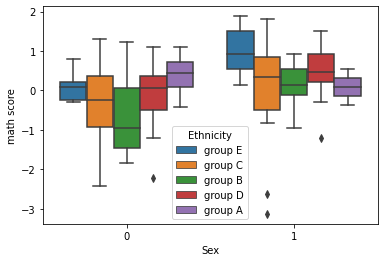

In [38]:
sns.boxplot(x=df['Sex'],y=df['math score'],hue=df['Ethnicity'])

## Handling Outliers
We can use three strategies to handle the outliers.
1. We can directly drop them

## Deleting Observation with Missing Values

In [39]:
# df[~np.isnan(features).any(axis=1)]
#alternatively using pandas we can drop as df.dropna()

## Imputing Missing Values
If we have a small amount of data, predict the missing values using k-nearest neighbors (KNN).
If we have large amount of data, then we go for mean, median depending upon the situation.

# HANDLING CATEGORICAL DATA
## 1. Encoding Nominal Categorical Features ( No Intrinsic ordering)

### One Hot Encoding
We can use pd.get_dummies(df['Ethnicity'])

In [40]:
df.head()
df.lunch.value_counts()
#df1 = pd.get_dummies(df["Ethnicity"],drop_first=True)
#df1

standard        71
free/reduced    29
Name: lunch, dtype: int64

In [41]:
df['lunch'].replace(['standard','free/reduced'],['0','1'],inplace=True)
df.head()

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,0,none,0.210248,0.440580,-0.009452
1,0,group C,some college,0,none,-1.268562,-1.315885,-1.292181
2,1,group E,high school,0,none,0.531729,0.147836,-0.076964
3,0,group B,some college,1,completed,-1.461450,-1.315885,-1.022132
4,0,group B,bachelor's degree,0,completed,0.017360,0.440580,0.733181


In [42]:
df['test preparation course'].value_counts()

none         65
completed    35
Name: test preparation course, dtype: int64

In [43]:
df['test preparation course'].replace(['none','completed'],['0','1'],inplace=True)

In [44]:
df.head()

,Sex,Ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,0,group E,associate's degree,0,0,0.210248,0.440580,-0.009452
1,0,group C,some college,0,0,-1.268562,-1.315885,-1.292181
2,1,group E,high school,0,0,0.531729,0.147836,-0.076964
3,0,group B,some college,1,1,-1.461450,-1.315885,-1.022132
4,0,group B,bachelor's degree,0,1,0.017360,0.440580,0.733181


In [45]:
df.Ethnicity.value_counts()

group C    33
group D    27
group B    22
group E    12
group A     6
Name: Ethnicity, dtype: int64

In [46]:
df = pd.get_dummies(df, columns=['Ethnicity'],drop_first=True)

In [47]:
df.rename(columns={'Ethnicity_group B':'Race:B',
                  'Ethnicity_group C':'Race:C',
                  'Ethnicity_group D':'Race:D',
                  'Ethnicity_group E':'Race:E'},inplace=True)
df.columns

Index(['Sex', 'Education', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score', 'Race:B', 'Race:C', 'Race:D',
       'Race:E'],
      dtype='object')

## 2. Encoding Ordinal Categorical Features
Use pandas DataFrame’s replace method to transform string labels to numerical equivalents

In [48]:
df.head()

,Sex,Education,lunch,test preparation course,math score,reading score,writing score,Race:B,Race:C,Race:D,Race:E
0,0,associate's degree,0,0,0.210248,0.440580,-0.009452,0,0,0,1
1,0,some college,0,0,-1.268562,-1.315885,-1.292181,0,1,0,0
2,1,high school,0,0,0.531729,0.147836,-0.076964,0,0,0,1
3,0,some college,1,1,-1.461450,-1.315885,-1.022132,1,0,0,0
4,0,bachelor's degree,0,1,0.017360,0.440580,0.733181,1,0,0,0


In [49]:
df['Education'].value_counts()

some college          25
associate's degree    21
some high school      18
high school           16
bachelor's degree     13
master's degree        7
Name: Education, dtype: int64

In [50]:
Education_Level = {'some high school':1,'high school':1.1,'some college':2,"associate's degree":3,"bachelor's degree":4,"master's degree":5}

In [51]:
df['Education'].replace(Education_Level,inplace=True)

In [52]:
df.head()

,Sex,Education,lunch,test preparation course,math score,reading score,writing score,Race:B,Race:C,Race:D,Race:E
0,0,3.0,0,0,0.210248,0.440580,-0.009452,0,0,0,1
1,0,2.0,0,0,-1.268562,-1.315885,-1.292181,0,1,0,0
2,1,1.1,0,0,0.531729,0.147836,-0.076964,0,0,0,1
3,0,2.0,1,1,-1.461450,-1.315885,-1.022132,1,0,0,0
4,0,4.0,0,1,0.017360,0.440580,0.733181,1,0,0,0


## Imputing Missing Values In Categorical Features
Either we can use the KNN to predict the missing values or we can use the mode to replace the missing values in categorical features.

# DATA VISUALIZATION

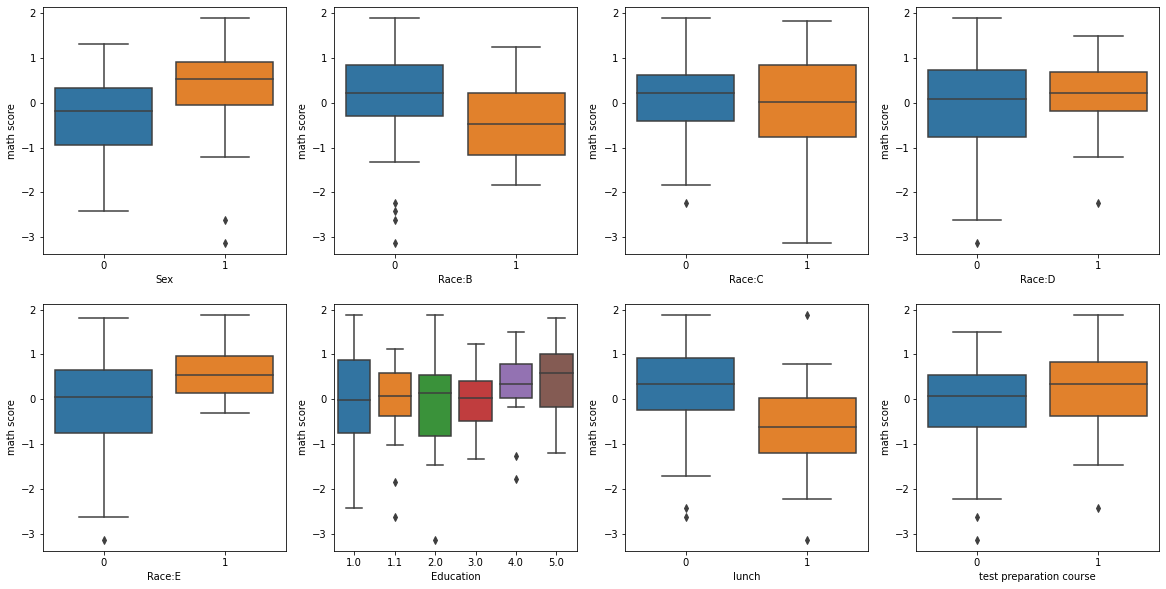

In [53]:
cat_features = ['Sex','Race:B','Race:C','Race:D','Race:E','Education','lunch','test preparation course']
num_features = ['math score','reading score','writing score']

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(cat_features, ax.flatten()):
    sns.boxplot(x=var, y='math score', data=df, ax=subplot)

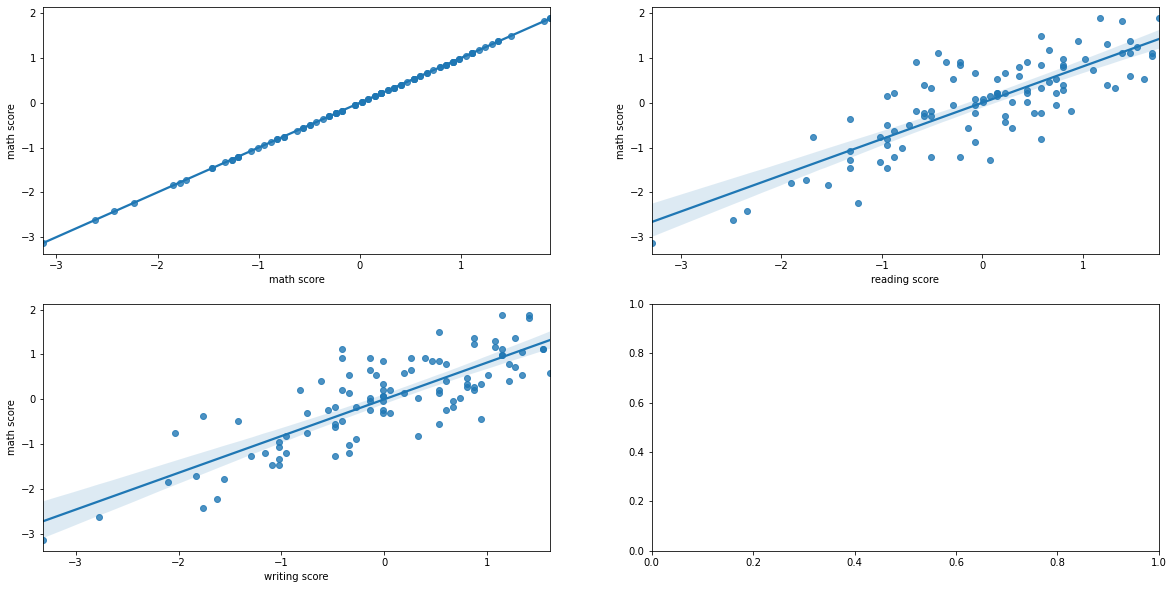

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for var, subplot in zip(num_features, ax.flatten()):
    sns.regplot(x=var, y='math score', data=df, ax=subplot)

# DATA MODELING

In [55]:
X = df.drop(['math score'],axis=1)
Y = df['math score']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression = LinearRegression(fit_intercept=True)
regression.fit(X_train, Y_train)
print("Training Score : ", regression.score(X_train,Y_train))

Training Score :  0.8961823546849201


In [58]:
Y_predict = regression.predict(X_test)
print("Testing Score : ", r2_score(Y_test, Y_predict))

Testing Score :  0.8554944218859186


In [59]:
df_final1 = pd.DataFrame({'predicted':Y_predict,'tested':Y_test})
df_final1.head()

,predicted,tested
4,0.268667,0.017360
26,0.594118,0.788913
94,0.374488,0.274544
19,0.785702,0.531729
74,-0.649047,-0.561305


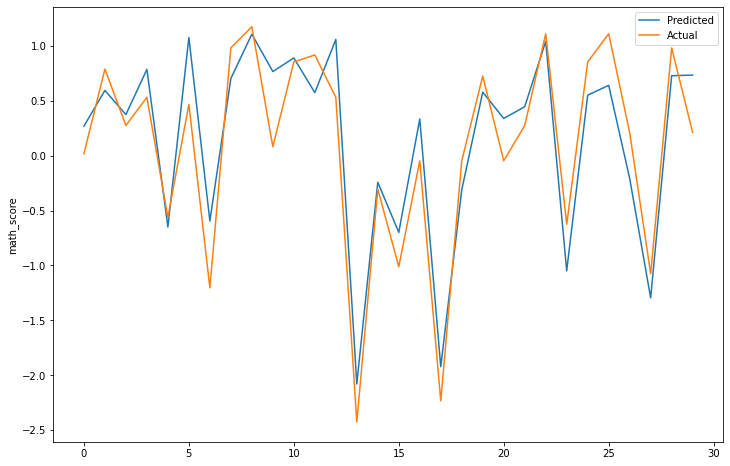

In [60]:
plt.figure(figsize = (12, 8))

plt.plot(Y_predict, label='Predicted')
plt.plot(Y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [61]:
X1 = df.drop(['math score','writing score','reading score'],axis=1)
Y1 = df['math score']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3)

In [63]:
regression1 = LinearRegression(fit_intercept=True)

In [64]:
regression1.fit(X_train, Y_train)
print("Training score: ",regression1.score(X_train,Y_train))

Training score:  0.42702476913086196


In [65]:
Y_predicted = regression1.predict(X_test)
print("Testing Score: ", r2_score(Y_test, Y_predicted))

Testing Score:  -0.03179871504404064


In [66]:
df_final2 = pd.DataFrame({'predicted':Y_predicted,'tested':Y_test})
df_final2.head()

,predicted,tested
63,0.371614,-0.818489
11,-0.492582,0.531729
1,-0.106138,-1.268562
73,0.087654,-0.304121
97,-0.866516,-0.175528


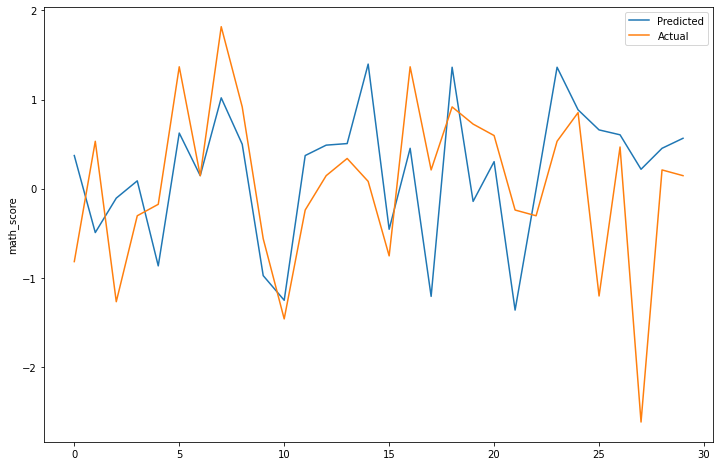

In [67]:
plt.figure(figsize = (12, 8))

plt.plot(Y_predicted, label='Predicted')
plt.plot(Y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()